In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (10, 2)

In [2]:
# если клетка падает, то просто перезапусти
from notmnist import load_notmnist


X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print(f"Train size  = {len(X_train):11}, test_size  = {len(X_test)}")
print(f"Train shape = {X_train.shape}, test_shape = {X_test.shape:}")

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if &lt;10 images are broken]
Done
Train size  =        2808, test_size  = 937
Train shape = (2808, 784), test_shape = (937, 784)


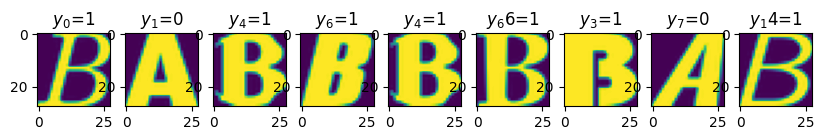

In [3]:
indeces = [0, 1, 4,6, 4, 66, 3, 7, 14]
for i, ind in enumerate(indeces):
    plt.subplot(1, len(indeces), i + 1)
    plt.imshow(X_train[ind].reshape([28, 28]))
    plt.title(f'$y_{ind}$=' + str(y_train[ind]))

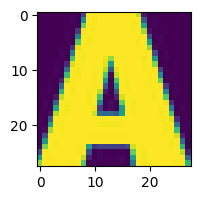

# Cheating

In [310]:
arr = []

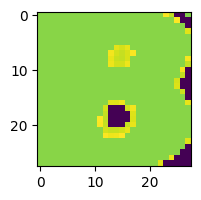

In [434]:
# for ii in tqdm(range(1, 100, 10)):
#     for jj in range(1, 100, 10):
#         for yy in range(1, 100, 10):
#             for xx in range(1, 100, 10):
mask = X_train[0].reshape([28, 28])
for ind, letter in enumerate(X_train):
    if y_train[ind] == 1:
        mask += letter.reshape([28, 28])
# plt.imshow(mask)
mask.shape
mask = mask.reshape([-1, 784])[0]
mask /= np.sum((mask>0).astype(int))
mask -= min(mask)
mask /= max(mask)
# print(min(mask), max(mask))
id_ = np.sum((mask>0).astype(int))
for ind, pixel in enumerate(mask):
    if pixel > 0.21:
        mask[ind] = 0.01
    elif pixel > 0 and pixel < 0.1:
        mask[ind] = -0.91
mask = mask.reshape([28, 28])
plt.imshow(mask)


-1.0 1.0


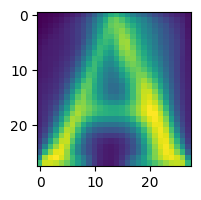

In [435]:
mask1 = X_train[1].reshape([28, 28]) 
for ind, letter in enumerate(X_train):
    if y_train[ind] == 0:
        mask1 += letter.reshape([28, 28])
# plt.imshow(mask)
mask1.shape
mask1 = mask1.reshape([-1, 784])[0]
mask1 /= np.sum((y_test<=0).astype(int)) # mask \in [A;B]


mask1 -= min(mask1) # mask \in [0; B-A]
mask1 /= (0.5*max(abs(mask1))) # mask \in [0; 2]
mask1 -= 1
A, B = min(mask1), max(mask1)
print(A, B)

# id_ = np.sum((mask>0).astype(int))
# for ind, pixel in enumerate(mask):
#     if pixel > 0.21:
#         mask[ind] = 0.01
#     elif pixel > 0 and pixel < 0.1:
#         mask[ind] = -0.91
mask1 = mask1.reshape([28, 28])
plt.imshow(mask1)

In [408]:
print(max(arr))

[tensor(90.1814), [0.21, 0.11, 0.01, 0.91]]


Загруженный датасет -- это картинки 28 на 28 с рукописными буквами А и В.

Нужно написать на торче классификатор, который умеет отличать одну букву от другой, то есть решить задачу бинарной классификации. Классификатор для буквы А должен выдавать 0, для B -- 1.

# Пишем Классификатор на Ручных Правилах

Для начала предлагаю тебе
- забыть обучающую выборку и придумать нейронный классификатор "из головы"
- заимплементить его,
- посчитать качество на валидации.

На классификатор есть ограничение: он должен состоять только из линейных функций.

In [409]:
import torch

class Layer():
    """
    Общий класс для слоя нейронной сети. 
    """
    def __init__(self):
        pass
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Прямое применение слоя ко входным данным
        """
        return input

Для начала создадим слой, который выделяет штрихи, специфичные для буквы B:

Text(0.5, 1.0, 'layer1.weights')

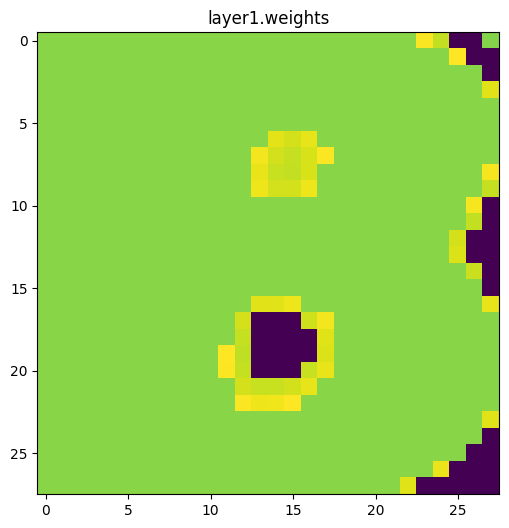

In [667]:
class IlyaLayer1(Layer):
    """
    Первый слой нейронной сети Ильи
    """
    def __init__(self):
        ### <YOUR CODE HERE> ###
        # self.weights = torch.zeros((784), dtype=torch.float).reshape([28,28])
        # self.weights[2:25,2:8] = -1.0
        # self.weights[3:24,3:7] = 1.0
        
        self.weights = torch.tensor(mask) # B
        self.weights1 = torch.tensor(mask1) # A
        
        self.weights = self.weights.reshape([784])
        self.weights1 = self.weights1.reshape([784])
        
        self.bias = -20.0 # B
        self.bias1 = -70.0 # A
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Применение первого слоя сети Ильи к входной картинке input (batch_size, 784)
        """
        ### <YOUR CODE HERE> ###
        # print([(input@self.weights+self.bias).shape, (input@self.weights1+self.bias1).shape])
        return torch.stack([input@self.weights+self.bias, input@self.weights1+self.bias1], dim=1)

layer1 = IlyaLayer1()
# help(torch.cat)
plt.imshow(layer1.weights.reshape([28, 28]));
plt.title('layer1.weights')

In [668]:
class IlyaLayer2(Layer):
    """
    Первый слой нейронной сети Ильи
    """
    def __init__(self):
        ### <YOUR CODE HERE> ###
        # self.weights = torch.zeros((784), dtype=torch.float).reshape([28,28])
        # self.weights[2:25,2:8] = -1.0
        # self.weights[3:24,3:7] = 1.0
        
#         self.weights = torch.tensor(mask) # B
#         self.weights1 = torch.tensor(mask1) # A
        
#         self.weights = self.weights.reshape([784])
#         self.weights1 = self.weights1.reshape([784])
        
        self.bias = 0 #-20.0 # B
        # self.bias1 = -50.0 # A
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Применение первого слоя сети Ильи к входной картинке input (batch_size, 784)
        """
        ### <YOUR CODE HERE> ###
        #[+500,-500]
        #[-500,+500]
        #...
        # print(input[:,0]-input[:,1]+self.bias)
        return (input[:,0]-input[:,1]+self.bias)/(2*784)

In [669]:
net = IlyaLayer2()
net.forward(
    torch.tensor([
        [500, -500],
        [-500, 500]
    ])
)

tensor([ 0.6378, -0.6378])

Теперь мы можем взять случайный пример из тестовой выборки и применить наш линейный слой с одним выходом:

x shape =  torch.Size([1, 784])


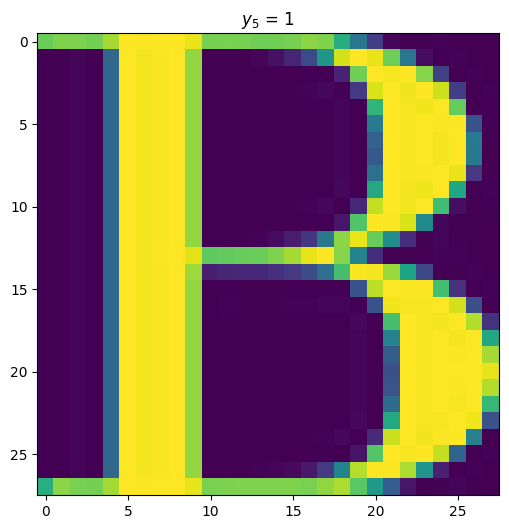

In [670]:
test_ind = 5

x = torch.tensor(X_test[test_ind]).reshape([1, 784])

print("x shape = ", x.shape)
plt.imshow(x.reshape([28, 28]))
plt.title(f'$y_{test_ind}$ = ' + str(y_test[test_ind]));

In [671]:
# print(x[:3])

In [672]:
plt.rcParams['figure.figsize'] = (10, 6)

torch.Size([1, 2])
Результат применения 1-ого слоя (активации): tensor([[ 5.2419, -7.6327]])
Размерность активаций                      : torch.Size([1, 2])


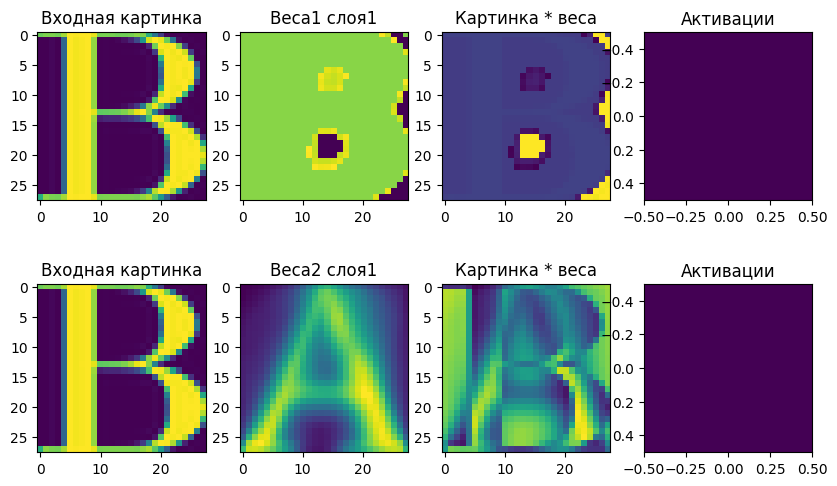

In [674]:
activations1 = layer1.forward(x)
print(activations1.shape)
plt.subplot(2, 4, 1)
plt.imshow(x.reshape([28, 28]))
plt.title('Входная картинка')

plt.subplot(2, 4, 2)
plt.imshow(layer1.weights.reshape([28, 28]))
plt.title('Веса1 слоя1')

plt.subplot(2, 4, 3)
plt.imshow((x * layer1.weights).reshape([28, 28]))
plt.title('Картинка * веса')

plt.subplot(2, 4, 4)
plt.imshow(activations1[0][0].reshape([1,1]))
plt.title('Активации')


plt.subplot(2, 4, 5)
plt.imshow(x.reshape([28, 28]))
plt.title('Входная картинка')

plt.subplot(2, 4, 6)
plt.imshow(layer1.weights1.reshape([28, 28]))
plt.title('Веса2 слоя1')

plt.subplot(2, 4, 7)
plt.imshow((x * layer1.weights1).reshape([28, 28]))
plt.title('Картинка * веса')

plt.subplot(2, 4, 8)
plt.imshow(activations1[0][1].reshape([1,1]))
plt.title('Активации')


print('Результат применения 1-ого слоя (активации):', activations1)
print('Размерность активаций                      :', activations1.shape)

Скорее всего к этому моменту ты придумал **линейную регресиию**. Поздравляю!

Давай вспомним, что мы решаем задачу классификации, и на выходе мы хотим получить **вероятность того, что на картинке буква B**, то есть что-то в промежутке $[0, 1]$.

Для **превращения регрессора в классификатор** проделаем два шага:

**Шаг 1**

- попробуй модифицировать первый слой так, чтобы активация >= 0 означала класс 1, а активация < 0 означала класс 0.

In [675]:
x.shape

torch.Size([1, 784])

In [676]:
layer1.weights.shape

torch.Size([784])

In [677]:
activations1_wo_bias = torch.dot(x.reshape([784]), layer1.weights)
activations1 = layer1.forward(x)

print('Результат применения 1-ого слоя без bias:', activations1_wo_bias)
print('Результат применения 1-ого слоя c bias  :', activations1)

Результат применения 1-ого слоя без bias: tensor(25.2419)
Результат применения 1-ого слоя c bias  : tensor([[ 5.2419, -7.6327]])


In [678]:
help(torch.sigmoid)

Help on built-in function sigmoid in module torch:

sigmoid(...)
    sigmoid(input, *, out=None) -> Tensor
    
    Alias for :func:`torch.special.expit`.



**Шаг 2**

- сделаем из активаций первогой слоя что-то между $0$ и $1$, для этого введем новый слой:

In [679]:
class IlyaLastLayer(Layer):
    """
    Последний слой нейронной сети Ильи
    """
    def __init__(self):
        ### <YOUR CODE HERE> ###
        pass
    
    def sigmoid(self, input):
        return 1/(1+torch.exp(-input))
    
    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """
        Применение последнео слоя сети Ильи к выходу предыдущих слоев (1,).
        Выдает один выход (1,), который означает вероятность буквы B на картинке.
        """
        ### <YOUR CODE HERE> ###
        return self.sigmoid(input_)


last_layer = IlyaLastLayer()

RuntimeError: shape '[1, 1]' is invalid for input of size 2

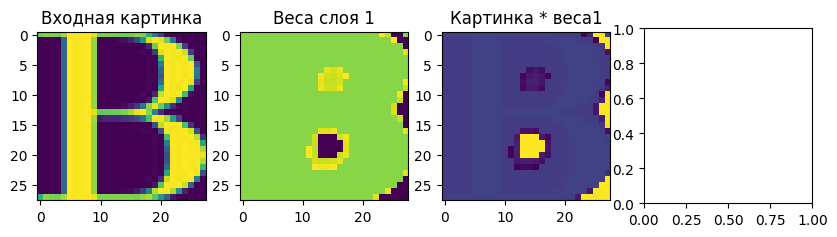

In [680]:
activations1 = layer1.forward(x)
pred_probas = last_layer.forward(activations1)

plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.imshow(x.reshape([28, 28]))
plt.title('Входная картинка')

plt.subplot(2, 4, 2)
plt.imshow(layer1.weights.reshape([28, 28]))
plt.title('Веса слоя 1')

plt.subplot(2, 4, 3)
plt.imshow((x * layer1.weights).reshape([28, 28]))
plt.title('Картинка * веса1')

plt.subplot(2, 4, 4)
plt.imshow(activations1.reshape(1, 1))
plt.title('Активации1')

plt.subplot(2, 4, 5)
plt.imshow(pred_probas.reshape(1, 1))
plt.title('Вероятность')

print('Результат применения 1-ого слоя (активации)       :', activations1)
print('Размерность активаций1                            :', activations1.shape)

print('Результат применения последнего слоя (вероятности):', pred_probas)

tensor([0.5138])

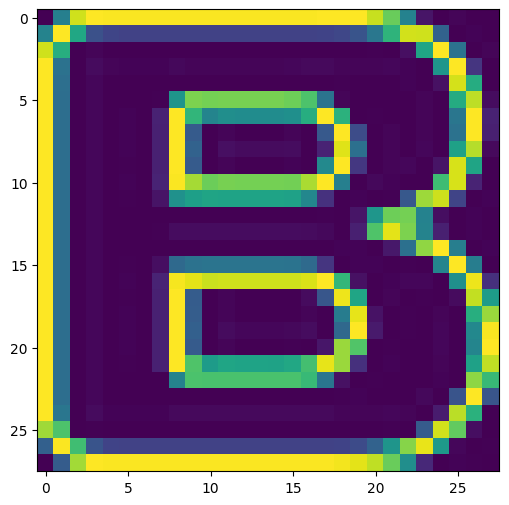

In [681]:
X = torch.tensor(X_test[0]).reshape([1, 784])
plt.imshow(X.reshape([28, 28]))
network = IlyaNetwork()
network.forward(X)

Круто! А это была **логистическая регрессия** (которая решает задачу совсем не регрессии, а классификации).

Можем собрать наш классификатор в один класс:

In [682]:
class IlyaNetwork(Layer):
    """
    Класс для нашей нейронной сети
    """
    def __init__(self):
        self.layer1 = IlyaLayer1()
        self.layer2 = IlyaLayer2()
        self.last_layer = IlyaLastLayer()
    
    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """
        Применение слоев сети в входной картинке input(batch_size, 784)
        """
        output1 = self.layer1.forward(input_)
        # print(output1)
        output2 = self.layer2.forward(output1)
        # print(output2)
        pred_probas = self.last_layer.forward(output2)
        return pred_probas


network = IlyaNetwork()
network.forward(x)

tensor([0.5021])

Стоит посчитать его качество на вылидационной выборке:

### Качество на Валидации

In [695]:
def accuracy(predictions: torch.Tensor, targets: torch.Tensor, threshold: float = 0.5):
    """точность предсказаний - доля верных ответов"""
    ### <YOUR CODE HERE> ###
    arr = (predictions>threshold) == targets
    return torch.sum(arr)/arr.shape[0]

In [703]:
predictions = torch.empty(len(X_test))
for i, x in enumerate(X_test):
    x_tensor = torch.tensor(x)
    predictions[i] = network.forward(x_tensor.reshape([1, 784]))
    
y_test_tensor = torch.tensor(y_test)
acc = accuracy(predictions, y_test_tensor, 0.5)
print(f"Мы угадываем правильный класс картинки в {acc*100:.5}% случаев на валидационной выборке.")

Мы угадываем правильный класс картинки в 81.75% случаев на валидационной выборке.


### Оптимизируем с Помощью Мини-Батчей

Давайте ускорим код, отвечающий за получения предсказаний и подсчет метрик. Если приглядеться в предыдущий кусок кода, то мы каждую картинку по отдельности пропускаем через сетку и получаем выход сети. Но намного быстрее будет пропустить через сеть сразу несколько примеров. Такая групка примеров называется мини-батчем (mini-batch), или иногда называются просто батчом.

**Задание** Перепиши классы выше так, чтобы они могли принимать сразу мини-батч примеров и без помощи for-loops (то есть векторно) получали предсказание. 

Теперь мы можем получать предсказания быстрее (посчитайте качество, получив предсказания мини-батчами):

In [421]:
from typing import Iterator, Tuple
from tqdm.auto import trange


def iterate_minibatches(inputs: np.ndarray, targets: np.ndarray, batch_size: int, shuffle: bool = False) \
        -> Iterator[Tuple[np.ndarray]]:
    """
    Проходимся по датасету мини-батчами 
    """
    assert len(inputs) == len(targets)
    
    if shuffle:
        indices = np.random.permutation(len(inputs))
    
    for start_idx in trange(0, len(inputs), batch_size):
        if shuffle:
            excerpt = indices[start_idx: start_idx + batch_size]
        else:
            excerpt = slice(start_idx, start_idx + batch_size)
        
        yield inputs[excerpt], targets[excerpt]

In [422]:
res = iterate_minibatches(X_test, y_test, 8)
type(res)

generator

In [423]:
### <YOUR CODE HERE> ###
predictions = torch.empty((0))
i = 0
for batch in iterate_minibatches(X_test, y_test, 32):
    # print(batch)
    predictions = torch.cat([predictions, network.forward(torch.tensor(batch[0]))])
    i += len(batch[0])
print(i, len(X_test))
acc = accuracy(predictions, torch.tensor(y_test), 0.5)
print(f"Мы угадываем правильный класс картинки в {acc*100:.5}% случаев на валидационной выборке.")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 888.49it/s]

937 937
Мы угадываем правильный класс картинки в 90.181% случаев на валидационной выборке.


In [98]:
help(torch.cat)

Help on built-in function cat in module torch:

cat(...)
    cat(tensors, dim=0, *, out=None) -> Tensor
    
    Concatenates the given sequence of :attr:`seq` tensors in the given dimension.
    All tensors must either have the same shape (except in the concatenating
    dimension) or be empty.
    
    :func:`torch.cat` can be seen as an inverse operation for :func:`torch.split`
    and :func:`torch.chunk`.
    
    :func:`torch.cat` can be best understood via examples.
    
    Args:
        tensors (sequence of Tensors): any python sequence of tensors of the same type.
            Non-empty tensors provided must have the same shape, except in the
            cat dimension.
        dim (int, optional): the dimension over which the tensors are concatenated
    
    Keyword args:
        out (Tensor, optional): the output tensor.
    
    Example::
    
        >>> x = torch.randn(2, 3)
        >>> x
        tensor([[ 0.6580, -1.0969, -0.4614],
                [-0.1034, -0.5790,  0.14

### Усложняем модель

Пока мы построили руками простую линейную регрессию. Мы нашли один характерный паттерн пикселей для символа B. Давай попробуем придумать еще один паттерн для буквы B, и на основе активаций двух паттернов будем решать, какой изображен символ.

_Важное условие:_ В качестве строительного материаламожно использовать только дифференцируемые функции (иногда torch потом не сумеет нам аналитически посчитать градиент). Например, это все функции без использования оператора `if` и без циклов.

Чтобы сделать функцию предсказания сложнее, обычно добавляют следующие нелинейные функции (функции активации):

![Функции активации](https://www.researchgate.net/profile/Junxi-Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm)

In [ ]:
class ReLU(Layer):    
    def forward(self, x):
        """f(x) = max(x)"""
        return ?

### Качество на Валидации